# Octave Example

Octave is a good alternative to Matlab for use in Jupyter notebooks. Octave can execute most .m files and doesn't have the Jupyter configuration/compatibility issues that Matlab has.

[octave kernel git](https://github.com/Calysto/octave_kernel)

## Installation

First install octave:
```
brew install octave
```

Once jupyterLab is installed and working, install the octave kernel:
```
pip install octave_kernel
```

If SOS is installed, octave support can be installed (same for both matlab and octave) with:
```
pip install sos-matlab
```
[sos octave/matlab user guide](https://vatlab.github.io/sos-docs/doc/user_guide/sos_matlab.html)

## Using Jupyter Octave Kernel

Here is an additional [octave notebook example](https://nbviewer.jupyter.org/github/Calysto/octave_kernel/blob/master/octave_kernel.ipynb)

### Hello World

In [1]:
disp("hello world")

hello world


### Calling Matlab Functions

Matlab functions can be called from .m files using Octave. In this example, .m files are located in `./tools/matlab`. 

#### Read a Waveform File

In [5]:
addpath ./tools/matlab/
% read binary waveform file (chirp with .80 fractional BW)
s = file2wave('./tools/waveforms/chirp80.bin');
% remove pre-appended zeros
s = s(513:end);
% normalize complex int16 signal scale
s = s./(2^15);

#### Plot Waveform and Spectrum

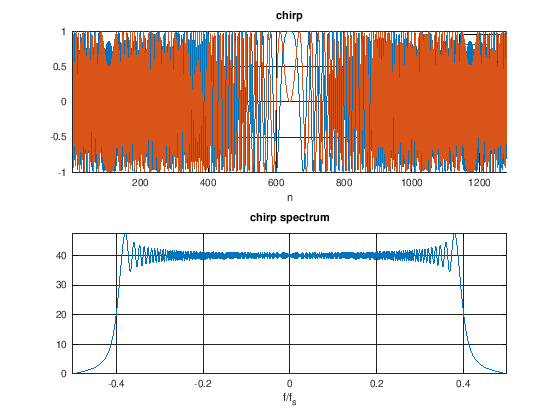

In [6]:
% plot waveform
figure;
subplot(2,1,1);
hold on;
plot(real(s));
plot(imag(s));
title('chirp'); xlabel('n');
grid on; xlim([1,numel(s)]);
legend('I','Q');

% plot spectrum
sfft = fftshift(fft(s));
f_norm = linspace(-.5,.5,numel(sfft));
subplot(2,1,2);
plot(f_norm,abs(sfft));
title('chirp spectrum'); xlabel('f/f_s');
grid on; axis tight;

#### Apply Matched Filter

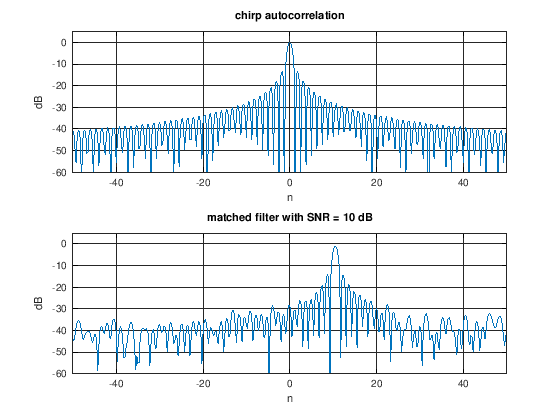

In [7]:
% matched filter and upsample using './tools/matlab/mfiltu.m'
upfac = 4;
[d,l] = mfiltu(s,s,upfac);
d = d./numel(d);

figure;
subplot(2,1,1);
plot(l/upfac,20*log10(abs(d)));
title('chirp autocorrelation'); xlabel('n'); ylabel('dB');
grid on; xlim([-50,50]); ylim([-60,5]);

% shift signal and add noise
snr = 10; %db
r = [s,zeros(1,128)];
noise = (10^(-snr/20))*(1/sqrt(2))*(randn(1,numel(r))+1i*randn(1,numel(r)));
r = shift(r,10.5) + noise;

% matched filter and upsample
[d1,l1] = mfiltu(r,s,upfac);
d1 = d1./numel(d1);

subplot(2,1,2);
plot(l1/upfac,20*log10(abs(d1)));
title(sprintf('matched filter with SNR = %g dB',snr)); xlabel('n'); ylabel('dB');
grid on; xlim([-50,50]); ylim([-60,5]);